# Detecção de anomalia utilizando LOF-Novelty

In [2]:
#Bibliotecas utilizadas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

In [ ]:
#Carregar banco de dados
dataset = pd.read_excel("Amostra-PZT.xlsx", header=None)

display(dataset)

In [ ]:
#Tratamento dos dados - Transpor
data = dataset.T

display(data)

In [ ]:
#Tratamento dos dados - Remover linha da frequencia
new_data = data.drop([0], axis=0)

display(new_data)

In [ ]:
#Tratamento dos dados - Mudar o indice para a coluna 0

#Converter a coluna 0 de Float para Int
new_data[0] = new_data[0].astype(int)

new_dataset = new_data.set_index(0)
new_dataset.index.names = [None]

display(new_dataset)

In [ ]:
#Gerar observações de treinamento normais
X_train = new_dataset.drop([17, 77, 137, 197, 257, 317, 332, 662, 992, 1322, 1652, 1982, 2312, 2642], axis=0)

display(X_train)

In [8]:
#Aplicando PCA em X_train
pca = PCA(n_components=2)
principalComponents_X_train = pca.fit_transform(X_train)
principalDf_X_train = pd.DataFrame(data= principalComponents_X_train)

display(principalDf_X_train)

,0,1
0,55.854353,27.526157
1,84.590791,-20.426608
2,-35.971417,11.090550
3,-40.940874,-25.065480
4,-63.532854,6.875381


In [ ]:
#Gerar novas observações normais
X_test = new_dataset.drop([2, 3, 4, 5, 6, 332, 662, 992, 1322, 1652, 1982, 2312, 2642], axis=0)

display(X_test)

In [10]:
#Aplicando PCA em X_test
pca_test = PCA(n_components=2)
principalComponents_X_test = pca_test.fit_transform(X_test)
principalDf_X_test = pd.DataFrame(data= principalComponents_X_test)

display(principalDf_X_test)

,0,1
0,-4261.866340,-2545.780768
1,-3835.522788,-1134.520556
2,-2372.964065,1662.581841
3,705.642581,4228.467197
4,4162.897112,1289.581502
5,5601.813499,-3500.329217


In [ ]:
#Gerar algumas observações novas anormais
X_outliers = new_dataset.drop([2, 3, 4, 5, 6, 17, 77, 137, 197, 257, 317], axis=0)

display(X_outliers)

In [12]:
#Aplicando PCA em X_outliers
pca_outliers = PCA(n_components=2)
principalComponents_X_outliers = pca_test.fit_transform(X_outliers)
principalDf_X_outliers = pd.DataFrame(data= principalComponents_X_outliers)

display(principalDf_X_outliers)

,0,1
0,-2700.589015,-903.925375
1,-2578.091555,-1219.470951
2,-2673.447895,-1084.106227
3,-2739.533291,-660.444472
4,-2649.065597,-61.735421
5,18220.566983,-43.481825
6,-2512.226962,1777.234026
7,-2367.612667,2195.930245


In [13]:
#Ajustar o modelo para detecção de novidade (novelty = True)
clf = LocalOutlierFactor(n_neighbors=4, novelty=True, contamination=0.1)
clf.fit(principalDf_X_train)

LocalOutlierFactor(contamination=0.1, n_neighbors=4, novelty=True)

In [19]:
#Predicao dos dados X_test e X_outliers
y_pred_test = clf.predict(principalDf_X_test)
y_pred_outliers = clf.predict(principalDf_X_outliers)

#Numero de erros dos dados
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

Text(0.5, 0, 'Erros novidade regular: 6 ; Erros novidade anormal: 0')

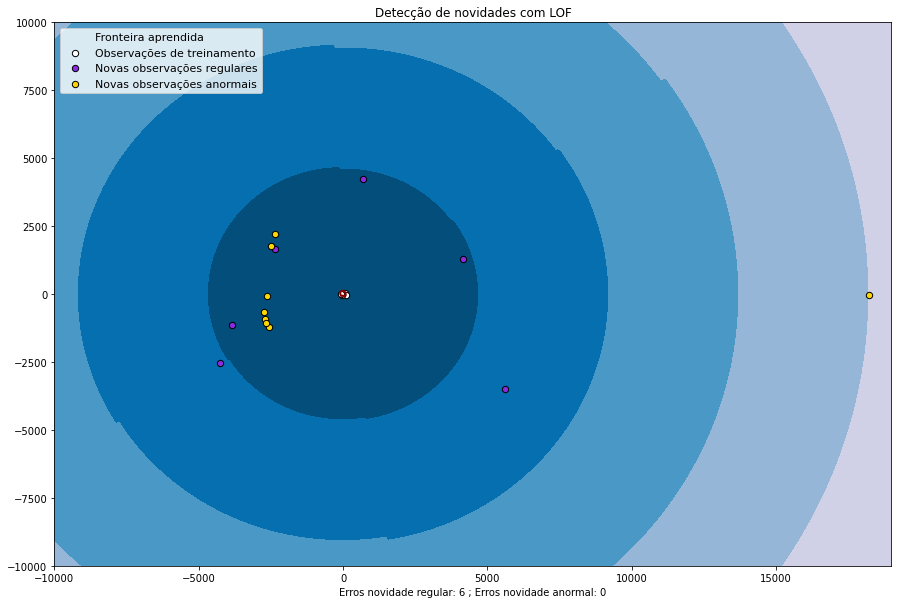

In [25]:
#Grafico
xx, yy = np.meshgrid(np.linspace(-10000, 19000, 500), np.linspace(-10000, 19000, 500))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(15,10))
plt.title("Detecção de novidades com LOF")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(principalDf_X_train[0], principalDf_X_train[1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(principalDf_X_test[0], principalDf_X_test[1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(principalDf_X_outliers[0], principalDf_X_outliers[1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-10000, 19000))
plt.ylim((-10000, 10000))

plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "Fronteira aprendida",
        "Observações de treinamento",
        "Novas observações regulares",
        "Novas observações anormais",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)

plt.xlabel(
    "Erros novidade regular: %d ; Erros novidade anormal: %d"
    % (n_error_test, n_error_outliers)
)